In [5]:
import pandas as pd
import numpy as np
#import math

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import re
from nltk import pos_tag
from nltk.corpus import wordnet

from imblearn.over_sampling import RandomOverSampler
import imblearn.pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer,\
      TfidfTransformer, TfidfVectorizer


from wordcloud import WordCloud

nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("wordnet")






from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

import string
import re


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df = pd.read_csv('twitter_data_utf8.csv')

### Data Understanding and Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [14]:
df.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

In [15]:
#changing column names since they are lenghty
df.columns = ["tweet", "products", "emotion"]
df.head()

tweet            products  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

            emotion  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [16]:
#check for missing values in tweet column
df[pd.isna(df["tweet"])]

tweet products                             emotion
6   NaN      NaN  No emotion toward brand or product

In [17]:
#drop this row
df.dropna(subset=["tweet"], inplace=True)

In [18]:
#check for missing value in row
df[pd.isna(df['products'])]

tweet products  \
5     @teachntech00 New iPad Apps For #SpeechTherapy...      NaN   
16    Holler Gram for iPad on the iTunes App Store -...      NaN   
32    Attn: All  #SXSW frineds, @mention Register fo...      NaN   
33        Anyone at  #sxsw want to sell their old iPad?      NaN   
34    Anyone at  #SXSW who bought the new iPad want ...      NaN   
...                                                 ...      ...   
9087  @mention Yup, but I don't have a third app yet...      NaN   
9089  Wave, buzz... RT @mention We interrupt your re...      NaN   
9090  Google's Zeiger, a physician never reported po...      NaN   
9091  Some Verizon iPhone customers complained their...      NaN   
9092  ŒÏ¡ŽÏàŠü_‹Ê‹Î‹Ò‹£‹Á‹ââ‹_‹£‹‹â_‹ÛâRT @...      NaN   

                                 emotion  
5     No emotion toward brand or product  
16    No emotion toward brand or product  
32    No emotion toward brand or product  
33    No emotion toward brand or product  
34    No emotion toward brand or product  
...                                  ...  
9087  No emotion toward brand or product  
9089  No emotion toward brand or product  
9090  No emotion toward brand or product  
9091  No emotion toward brand or product  
9092  No emotion toward brand or product  

[5801 rows x 3 columns]

In [19]:
#checking the percentage of NaN in the product column

missing_products_percentage = (df['products'].isna().sum() / len(df)) * 100
print(round(missing_products_percentage, 2))

63.8


In [20]:
# Replacing the NaNs with "Unknown"
df['products'].fillna('Unknown', inplace=True)

<ipython-input-20-92ef972add3d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['products'].fillna('Unknown', inplace=True)


In [21]:
#verifying that null values have been handled
df.isna().sum()

tweet       0
products    0
emotion     0
dtype: int64

In [22]:
df['products'].value_counts()

products
Unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

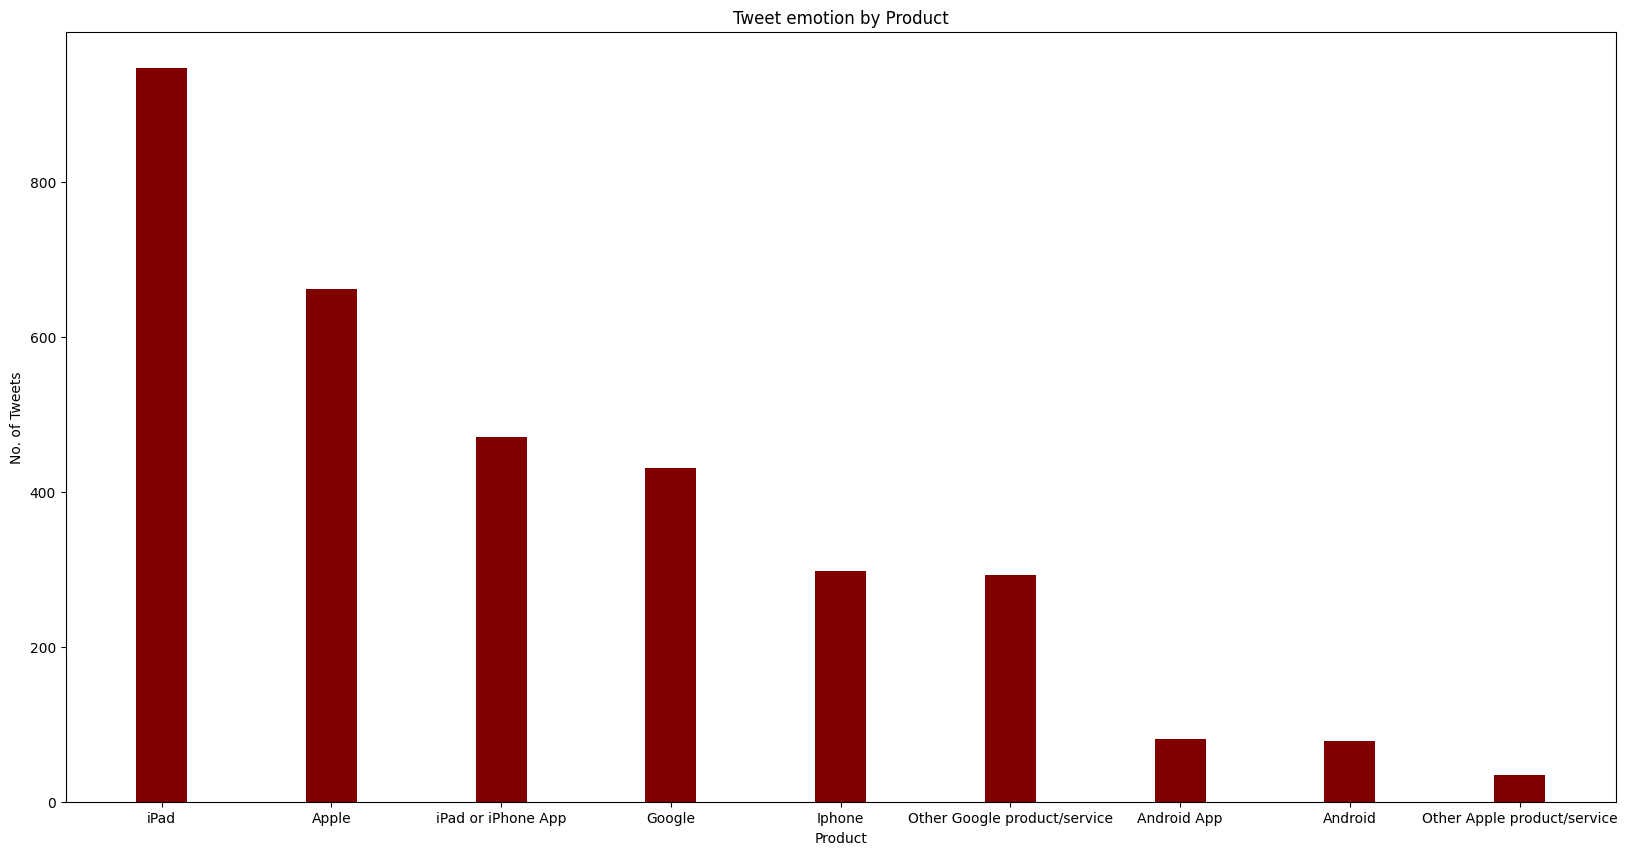

In [23]:

data = {'iPad':946, 'Apple':661, 'iPad or iPhone App':470, 'Google':430, 'Iphone':297,
        'Other Google product/service':293, 'Android App':81, 'Android':78,
        'Other Apple product/service':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (20, 10))

plt.bar(courses, values, color ='maroon',
        width = 0.3)

plt.xlabel("Product")
plt.ylabel("No. of Tweets")
plt.title("Tweet emotion by Product")
plt.show()

In [24]:
# Similar to the initial column names, we will clean the values in the emotion column
# for easy interpretability and to shorten the amount of typing for the code.

emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative',
                'No emotion toward brand or product': 'Neutral',
                "I can't tell": 'Unknown'}
df['emotion'] = df['emotion'].map(emotion_dict)
df.head()

tweet            products  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

    emotion  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive

In [25]:
df['emotion'].value_counts()

emotion
Neutral     5388
Positive    2978
Negative     570
Unknown      156
Name: count, dtype: int64

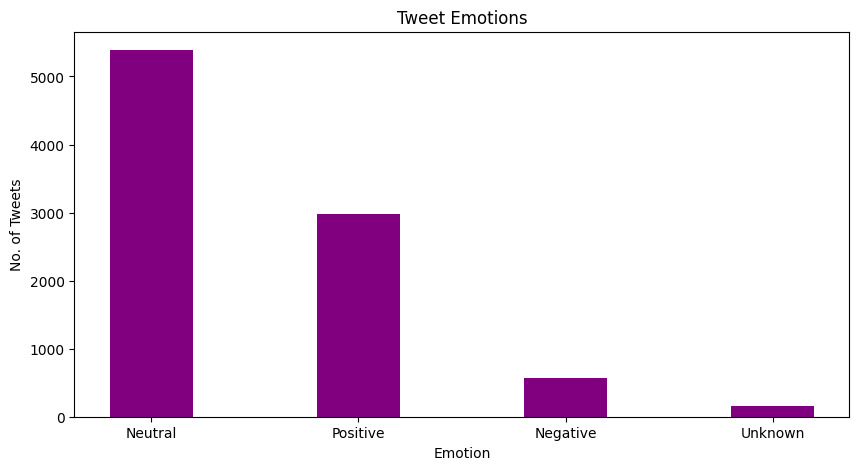

In [26]:
data = { 'Neutral':5388, 'Positive':2978, 'Negative':570, 'Unknown':156}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='purple',
        width = 0.4)

plt.xlabel("Emotion")
plt.ylabel("No. of Tweets")
plt.title("Tweet Emotions")
plt.show()

In [27]:
# 'Unknown' makes up a very small portion of tweets and will not be useful in our analysis so we drop them

df = df[df['emotion']!='Unknown']
df['emotion'].value_counts()

emotion
Neutral     5388
Positive    2978
Negative     570
Name: count, dtype: int64

# Data Exploration


#### Given the business proble, we will analyze positive vs negative tweets as well as Apple vs Google tweets. We will start with positive tweets¶

#### Tokenization

In [28]:

df_positive = df[df['emotion']=='Positive']
#verifying that neutral and negative tweets have been removed
df_positive['emotion'].value_counts()

emotion
Positive    2978
Name: count, dtype: int64

In [29]:
corpus_pos = df_positive['tweet'].to_list()
corpus_pos[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

In [30]:
# TweetTokenizer has built-in functionality such as processing handles and hashtags.

from nltk import TweetTokenizer
import string

#functionize tokenization of tweets
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken
    down into tokens based on TweetTokenizer from the nltk package.
    -------------------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case
    stip_handles: whether to remove twitter handles"""

    tokenizer = TweetTokenizer(preserve_case=preserve_case,
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [31]:
#tokenize positive tweets
tokens_pos = tokenize_tweets(corpus_pos)

In [32]:
#displaying 20 most common tokens
from nltk import FreqDist
freq = FreqDist(tokens_pos)
freq.most_common(20)

[(',', 4062),
 ('#sxsw', 2991),
 ('.', 2235),
 ('the', 1597),
 ('!', 1245),
 ('link', 1217),
 ('{', 1213),
 ('}', 1213),
 ('to', 1160),
 ('at', 1022),
 ('ipad', 1013),
 ('rt', 933),
 ('for', 908),
 ('a', 792),
 ('apple', 713),
 ('is', 647),
 ('of', 639),
 ('in', 631),
 ('google', 604),
 ('and', 584)]

#### Lemmatize

In [33]:
def lemmatize_tokens(tokens_list):

    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

In [34]:
#lemmatizing positive tweet tokens
tokens_pos_lemm = lemmatize_tokens(tokens_pos)

In [35]:
freq = FreqDist(tokens_pos_lemm)
freq.most_common(30)

[(',', 4062),
 ('#sxsw', 2991),
 ('.', 2235),
 ('the', 1597),
 ('!', 1245),
 ('link', 1221),
 ('{', 1213),
 ('}', 1213),
 ('to', 1160),
 ('at', 1022),
 ('ipad', 1013),
 ('rt', 933),
 ('for', 908),
 ('a', 866),
 ('apple', 714),
 ('is', 647),
 ('of', 639),
 ('in', 632),
 ('google', 604),
 ('2', 595),
 ('and', 584),
 ('store', 555),
 (':', 482),
 ('iphone', 466),
 ('"', 464),
 ('on', 442),
 ('i', 442),
 ('-', 399),
 ('app', 388),
 ('it', 377)]

#### Punctuation and Stopword removal

In [36]:
stop_lst = stopwords.words('english')
stop_lst += list(string.punctuation)
#removing additional punctuation and stopwords with sxsw conference name
additional_punc = ['“','”','...',"''",'’','``','']
stop_lst += additional_punc
stop_lst += ['#sxsw', '#sxswi', 'sxsw']

In [37]:
# function to remove of stop words
def remove_stop(tokens, stop_list=stop_lst):

# encoding/decoding tokens to eliminate unrecognized symbols and
# eliminating external links
    tokens_stopped = [word.encode('ascii','ignore').decode()
                      for word in tokens
                      if (word not in stop_list) &
                      (word.startswith('http') == False)]

    return tokens_stopped

In [38]:
tokens_pos_ls = remove_stop(tokens_pos_lemm)

In [39]:

freq = FreqDist(tokens_pos_ls)
freq.most_common(50)

[('link', 1221),
 ('ipad', 1013),
 ('rt', 933),
 ('apple', 714),
 ('google', 604),
 ('2', 596),
 ('store', 555),
 ('iphone', 466),
 ('', 435),
 ('app', 388),
 ('new', 358),
 ('austin', 252),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 162),
 ('party', 151),
 ('pop-up', 151),
 ('line', 143),
 ('time', 137),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 125),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 116),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 113),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('awesome', 94),
 ('#ipad', 93),
 ('good', 93),
 ('love', 93),
 ('mobile', 92),
 ('network', 91),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82)]

### Word Clouds

In [40]:
#defining a function to find the n most common tokens

def find_frequent(tokens, n=50):

    freq = FreqDist(tokens)
    display(freq.most_common(n))

In [41]:
find_frequent(tokens_pos_ls)

[('link', 1221),
 ('ipad', 1013),
 ('rt', 933),
 ('apple', 714),
 ('google', 604),
 ('2', 596),
 ('store', 555),
 ('iphone', 466),
 ('', 435),
 ('app', 388),
 ('new', 358),
 ('austin', 252),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 162),
 ('party', 151),
 ('pop-up', 151),
 ('line', 143),
 ('time', 137),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 125),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 116),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 113),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('awesome', 94),
 ('#ipad', 93),
 ('good', 93),
 ('love', 93),
 ('mobile', 92),
 ('network', 91),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82)]

In [42]:

#defining a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='black',
                       colormap='Greens', display=True):

    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""

    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations,
                          background_color=background_color,
                          colormap=colormap,
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    if display:
        plt.figure(figsize = (12, 15), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis('off');
    return wordcloud

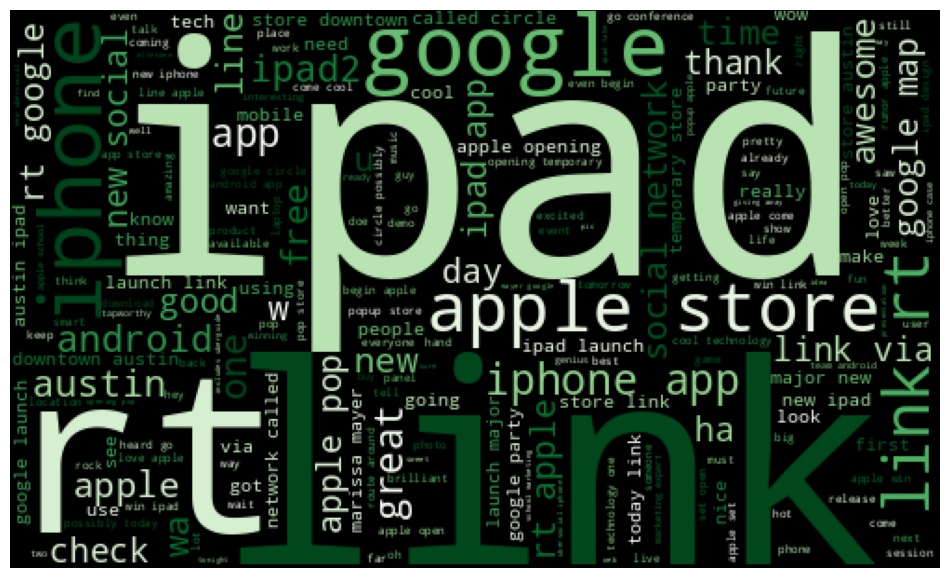

In [43]:
cloud_pos_w_company = generate_wordcloud(tokens_pos_ls, collocations=True)

People seem to be tweeting positivelt about ipad and iphone. Not really that insightfull

In [44]:
#removing product/company names, and other words that we cant gain insight from
stop_lst_no_comp = stop_lst + ['ipad', 'apple', 'google', 'iphone', '#apple',
                               '#google', '#ipad', '#iphone', 'android', 'link', 'rt', 'app', 'store']
tokens_pos_ls = remove_stop(tokens_pos_ls, stop_list=stop_lst_no_comp)

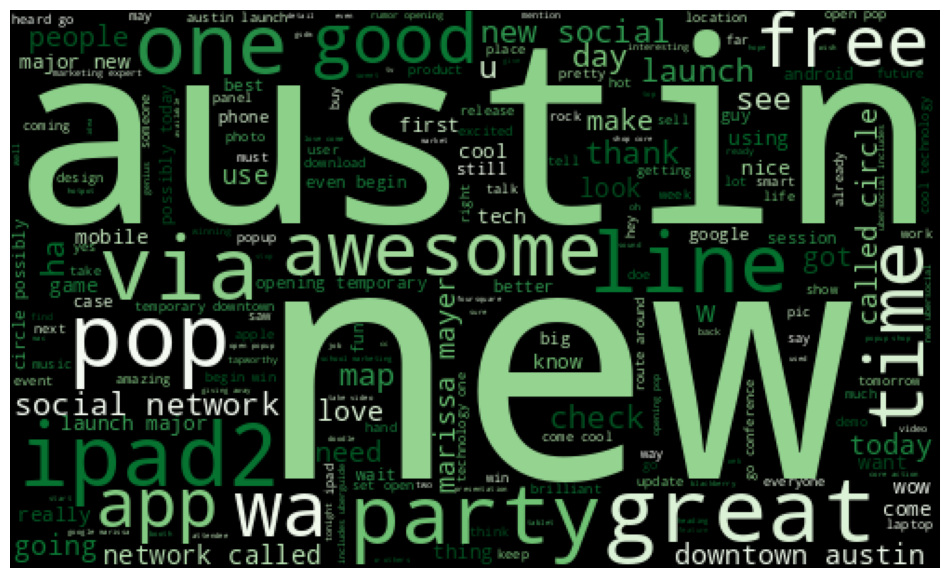

In [45]:
cloud_pos_wo_company = generate_wordcloud(tokens_pos_ls, collocations=True)

People seem to be exited about new apps and perhaps apple stores. Also people seen to be enjoying Austin.

#### Negative tweets

In [46]:
#parsing positive tweets into new df
df_negative = df[df['emotion']=='Negative']
#verifying that neutral and negative tweets have been removed
df_negative['emotion'].value_counts()

emotion
Negative    570
Name: count, dtype: int64

In [47]:
#parsing tweets into a list
corpus_neg = df_negative['tweet'].to_list()
corpus_neg[:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now‰ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw']

In [48]:

tokens_neg = tokenize_tweets(corpus_neg)

tokens_neg_lemm = lemmatize_tokens(tokens_neg)

tokens_neg_clean = remove_stop(tokens_neg_lemm, stop_list = stop_lst_no_comp)

In [56]:
find_frequent(tokens_neg_clean)

[('2', 81),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('ha', 31),
 ('circle', 29),
 ('design', 29),
 ('people', 29),
 ('social', 28),
 ('apps', 26),
 ('get', 25),
 ('wa', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 23),
 ('launch', 22),
 ('one', 22),
 ('day', 21),
 ('today', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('would', 19),
 ('network', 18),
 ('phone', 18),
 ('headache', 17),
 ('news', 17),
 ('go', 17),
 ('long', 17),
 ('product', 17),
 ('user', 16),
 ("i've", 16),
 ("i'm", 16),
 ('battery', 16),
 ('thing', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15),
 ('money', 14),
 ('major', 14),
 ('really', 14),
 ('via', 14),
 ('fascist', 14),
 ('way', 14),
 ('talk', 14),
 ('take', 14),
 ('many', 13),
 ('going', 13)]

In [58]:

tokens_neg_clean = remove_stop(tokens_neg_clean, stop_list=stop_lst_no_comp)

cloud_neg_wo_company = generate_wordcloud(tokens_neg_ls, colormap='Reds',
                                          collocations=True)

NameError: name 'tokens_neg_ls' is not defined

Tweets related to Apple

In [59]:
df['products'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [60]:
#mapping products to brands
brand_dict={'iPhone': 'Apple', 'iPad or iPhone App': 'Apple', 'iPad': 'Apple',
            'Google': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Apple': 'Apple', 'Android App': 'Google',
            'Other Google product or service': 'Google',
            'Other Apple product or service': 'Apple'}
df['Brand'] = df['products'].map(brand_dict)
df['Brand'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [62]:
df_apple = df[df['Brand']=='Apple']
corpus_apple = df_apple['tweet'].to_list()

In [54]:

tokens_apple = tokenize_tweets(corpus_apple)

tokens_apple_lemm = lemmatize_tokens(tokens_apple)

tokens_apple_ls = remove_stop(tokens_apple_lemm, stop_list = stop_lst)

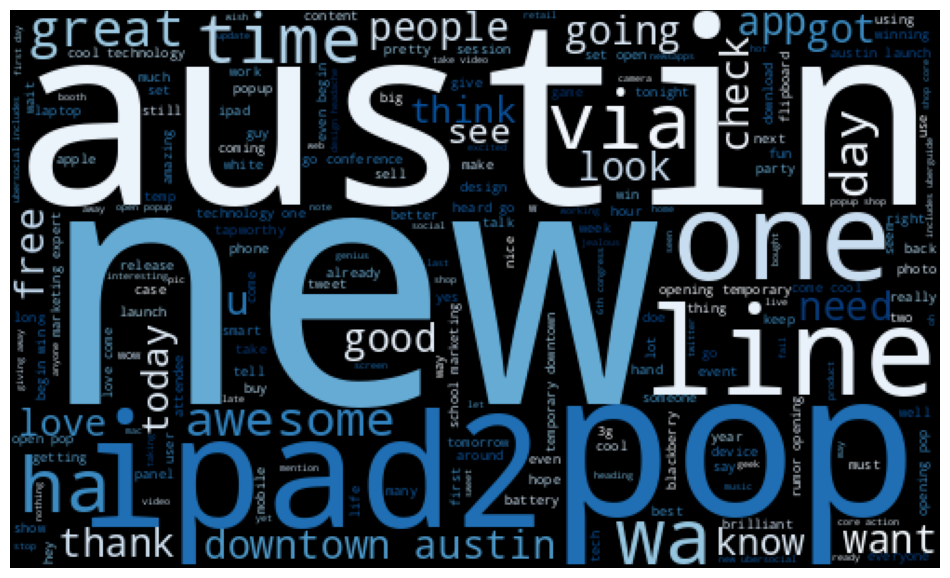

In [63]:
tokens_apple_ls = remove_stop(tokens_apple_ls, stop_list = stop_lst_no_comp)
generate_wordcloud(tokens_apple_ls, colormap='Blues', collocations=True)

#### Tweets related to Google

In [64]:
df_google = df[df['Brand']=='Google']
corpus_google = df_google['tweet'].to_list()

In [65]:

tokens_google = tokenize_tweets(corpus_google)

tokens_google_lemm = lemmatize_tokens(tokens_google)

tokens_google_ls = remove_stop(tokens_google_lemm, stop_list = stop_lst)

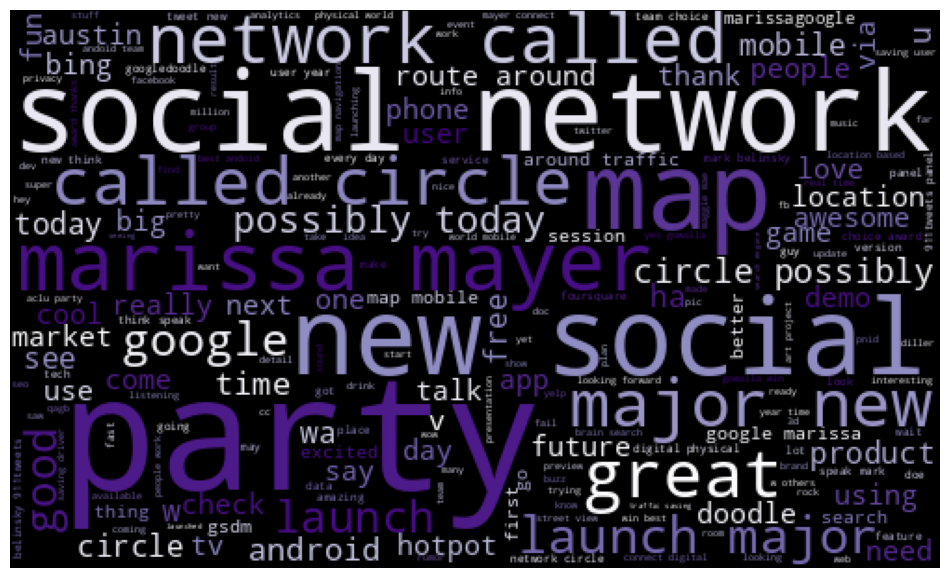

In [66]:
tokens_google_ls = remove_stop(tokens_google_ls, stop_list = stop_lst_no_comp)
generate_wordcloud(tokens_google_ls, colormap='Purples', collocations=True)

Now that we have explored the common words found in positive, negative, apple, and google tweets. We will start cooking with crisco and combine parameters to get positive/negative wordclouds for each company. We will start with positive apple tweets.

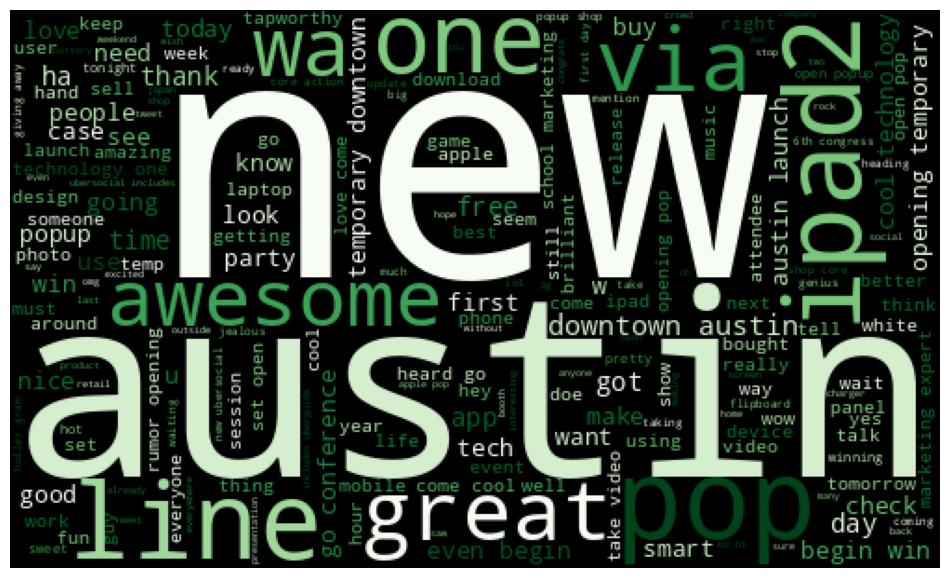

In [67]:


df_apple_positive = df_apple[df_apple['emotion'] == 'Positive']


corpus_apple_positive = df_apple_positive['tweet'].to_list()


tokens_apple_positive = tokenize_tweets(corpus_apple_positive)
tokens_apple_positive_lemm = lemmatize_tokens(tokens_apple_positive)
tokens_apple_positive_ls = remove_stop(tokens_apple_positive_lemm, stop_list=stop_lst_no_comp)



cloud_apple_positive = generate_wordcloud(tokens_apple_positive_ls, collocations=True)

Apple had a pop up store at sxsw. It seems like it was popular

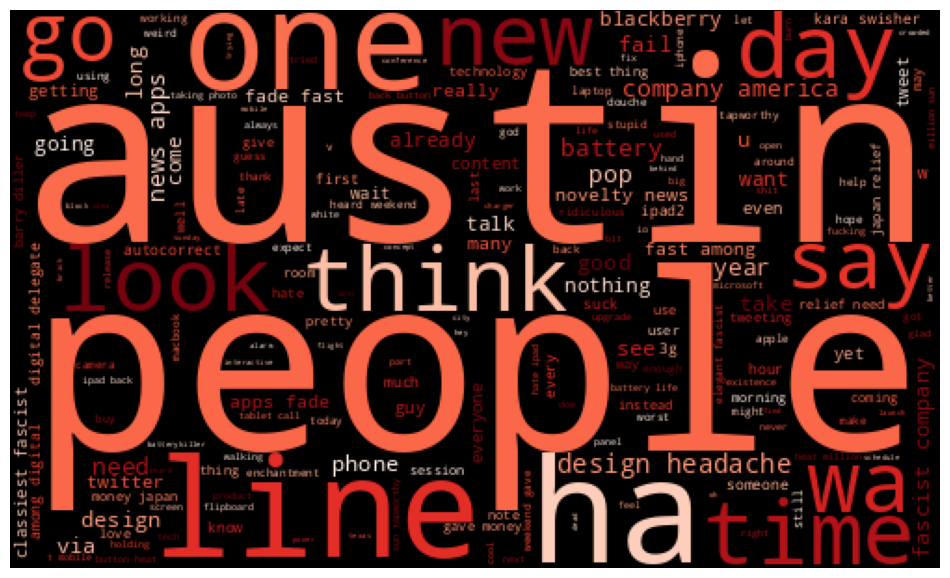

In [68]:
# repeat for negative apple tweets
df_apple_negative = df_apple[df_apple['emotion'] == 'Negative']

# Create a corpus of positive apple tweets
corpus_apple_negative = df_apple_negative['tweet'].to_list()

# Tokenize, lemmatize, and remove stop words for positive apple tweets
tokens_apple_negative = tokenize_tweets(corpus_apple_negative)
tokens_apple_negative_lemm = lemmatize_tokens(tokens_apple_negative)
tokens_apple_negative_ls = remove_stop(tokens_apple_negative_lemm, stop_list=stop_lst_no_comp)


# Generate a word cloud for positive apple tweets
cloud_apple_negative = generate_wordcloud(tokens_apple_negative_ls, colormap='Reds', collocations=True)

Some words we can draw insight from are battery, design headache, and fascist

### Now to do the same for google tweets

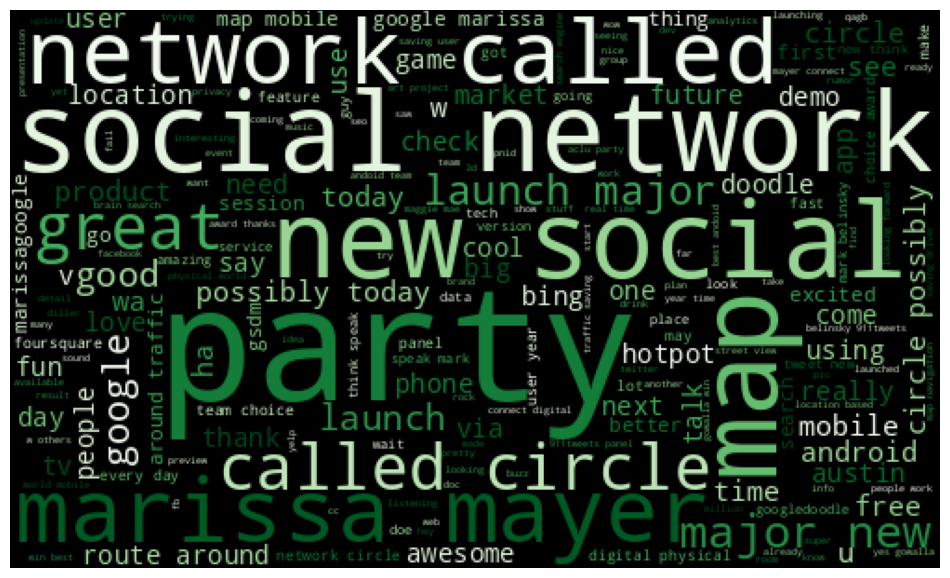

In [69]:
df_google_positive = df_google[df_google['emotion'] == 'Positive']

corpus_google_positive = df_google_positive['tweet'].to_list()

tokens_google_positive = tokenize_tweets(corpus_google_positive)
tokens_google_positive_lemm = lemmatize_tokens(tokens_google_positive)
tokens_google_positive_ls = remove_stop(tokens_google_lemm, stop_list=stop_lst_no_comp)

cloud_google_positive = generate_wordcloud(tokens_google_positive_ls, collocations=True)

Ipad 2 was a popular word in positive apple tweets. I was released in 2011. That was the same year Google launched Google+ a social netword that was supposed to rival Facebook. These tweets are likely from SXSW 2011. Marissa Mayer seems to be viewed positively as well.

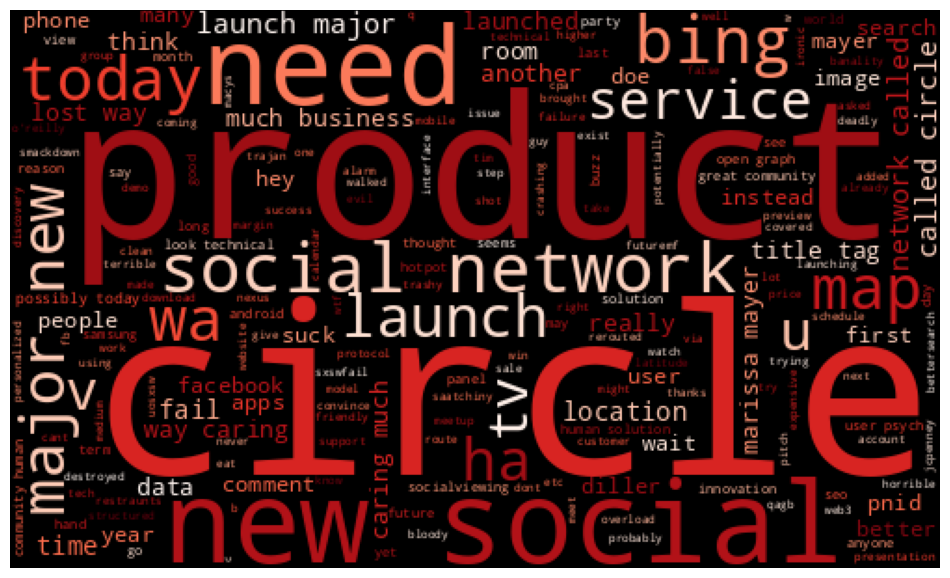

In [70]:
df_google_negative = df_google[df_google['emotion'] == 'Negative']


corpus_google_negative = df_google_negative['tweet'].to_list()


tokens_google_negative = tokenize_tweets(corpus_google_negative)
tokens_google_negative_lemm = lemmatize_tokens(tokens_google_negative)
tokens_google_negative_ls = remove_stop(tokens_google_negative_lemm, stop_list=stop_lst_no_comp)


cloud_google_negative = generate_wordcloud(tokens_google_negative_ls, colormap='Reds', collocations=True)

Seems that Googles social network was unpopular from the start.

##Models

We are creating a model for binary classification, so we need to remove neutral emotions from our tweets make our target column (emotion) binary

In [78]:
#removing neutral tweets for binary classification
df_binary = df[df['emotion']!='Neutral']
#verifying that neutral tweets have been removed
df_binary['emotion'].unique()

array(['Negative', 'Positive'], dtype=object)

In [79]:
#binarizing emotion column
emotion_dict = {'Negative': 0, 'Positive': 1}
df_binary['emotion'] = df_binary['emotion'].map(emotion_dict)

<ipython-input-79-1d50c523e85d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['emotion'] = df_binary['emotion'].map(emotion_dict)


In [80]:
#train_test_split the dataset
y = df_binary['emotion']
X = df_binary['tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

####Creating dummy classifier as a baseline to compare our model to

In [110]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)

Train Score: 0.8372792183389703
Test Score: 0.8455467869222097

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.85      1.00      0.92       750

    accuracy                           0.85       887
   macro avg       0.42      0.50      0.46       887
weighted avg       0.71      0.85      0.77       887


Confusion Matrix:
 [[  0 137]
 [  0 750]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


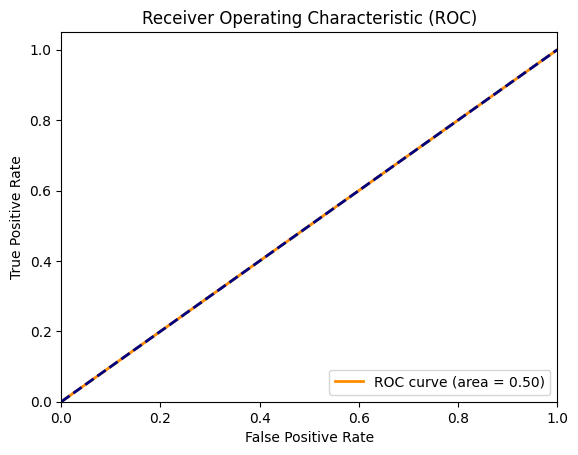

In [81]:


from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=5000) # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Create a DummyClassifier (most_frequent strategy)
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the model
dummy_clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = dummy_clf.predict(X_test_vec)

# Evaluate the model
train_score = dummy_clf.score(X_train_vec, y_train)
test_score = dummy_clf.score(X_test_vec, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


if len(np.unique(y_test)) == 2:
  y_pred_proba = dummy_clf.predict_proba(X_test_vec)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()


### Now we will run a random forest

Train Score: 1.0
Test Score: 0.8816234498308907

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.26      0.40       137
           1       0.88      1.00      0.93       750

    accuracy                           0.88       887
   macro avg       0.90      0.63      0.67       887
weighted avg       0.89      0.88      0.85       887


Confusion Matrix:
 [[ 35 102]
 [  3 747]]


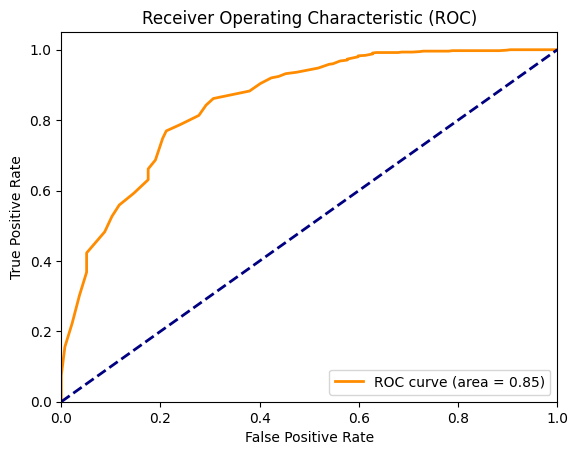

In [88]:



rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train_vec, y_train)

y_pred = rf_clf.predict(X_test_vec)

train_score = rf_clf.score(X_train_vec, y_train)
test_score = rf_clf.score(X_test_vec, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

if len(np.unique(y_test)) == 2:
  y_pred_proba = rf_clf.predict_proba(X_test_vec)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

We will use a random oversmapler to see if it improves performance

Train Score: 1.0
Test Score: 0.8850056369785795

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.32      0.46       137
           1       0.89      0.99      0.94       750

    accuracy                           0.89       887
   macro avg       0.86      0.65      0.70       887
weighted avg       0.88      0.89      0.86       887


Confusion Matrix:
 [[ 44  93]
 [  9 741]]


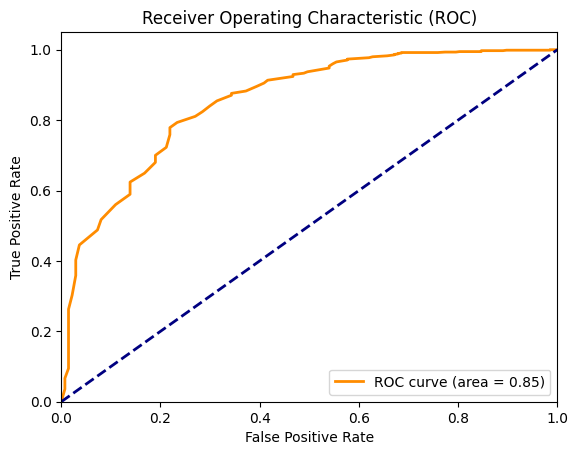

In [89]:


pipeline = imblearn.pipeline.Pipeline([
    ('sampling', RandomOverSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])


pipeline.fit(X_train_vec, y_train)


y_pred = pipeline.predict(X_test_vec)


train_score = pipeline.score(X_train_vec, y_train)
test_score = pipeline.score(X_test_vec, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


if len(np.unique(y_test)) == 2:
  y_pred_proba = pipeline.predict_proba(X_test_vec)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

Small improvement so we will go with this one

## Conclusion

Organize a pop-up store for next years SXSW

Have Marrisa Mayer speak at next year’s SXSW

## Next Steps

Analyze posts on other platforms (reddit, facebook,) to capture other types of users.

Analyze neutral tweets and try to convert them to positive